In [1]:
import sys
import network as netfn
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import plot as pltfn
from sklearn.cluster import KMeans
plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

In [10]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
itbinlist = sorted(glob.glob('*cutbinarised*')) #iterated list - binarised trace
realcoordlist = sorted(glob.glob('*02**realcoord.npy'))  
realtracelist = sorted(glob.glob('*realtrace.npy'))
dfflist = sorted(glob.glob('*02*BLN*_deltaff.npy'))
nnblist = sorted(glob.glob('*.*nnb.npy'))
realtracelist = realtracelist[3:]
realtracelist

['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_realtrace.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_realtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_realtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_realtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_realtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_realtr

In [83]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*deltaff.npy'))
p5list = sorted(glob.glob('*PTZ05*deltaff.npy'))
p20list = sorted(glob.glob('*PTZ20*deltaff.npy'))
i = 9

In [ ]:
blnlist[0]

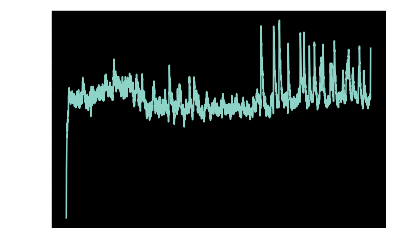

In [293]:
blnav = np.apply_along_axis(np.mean,0, np.load(blnlist[i]))
plt.plot(blnav)

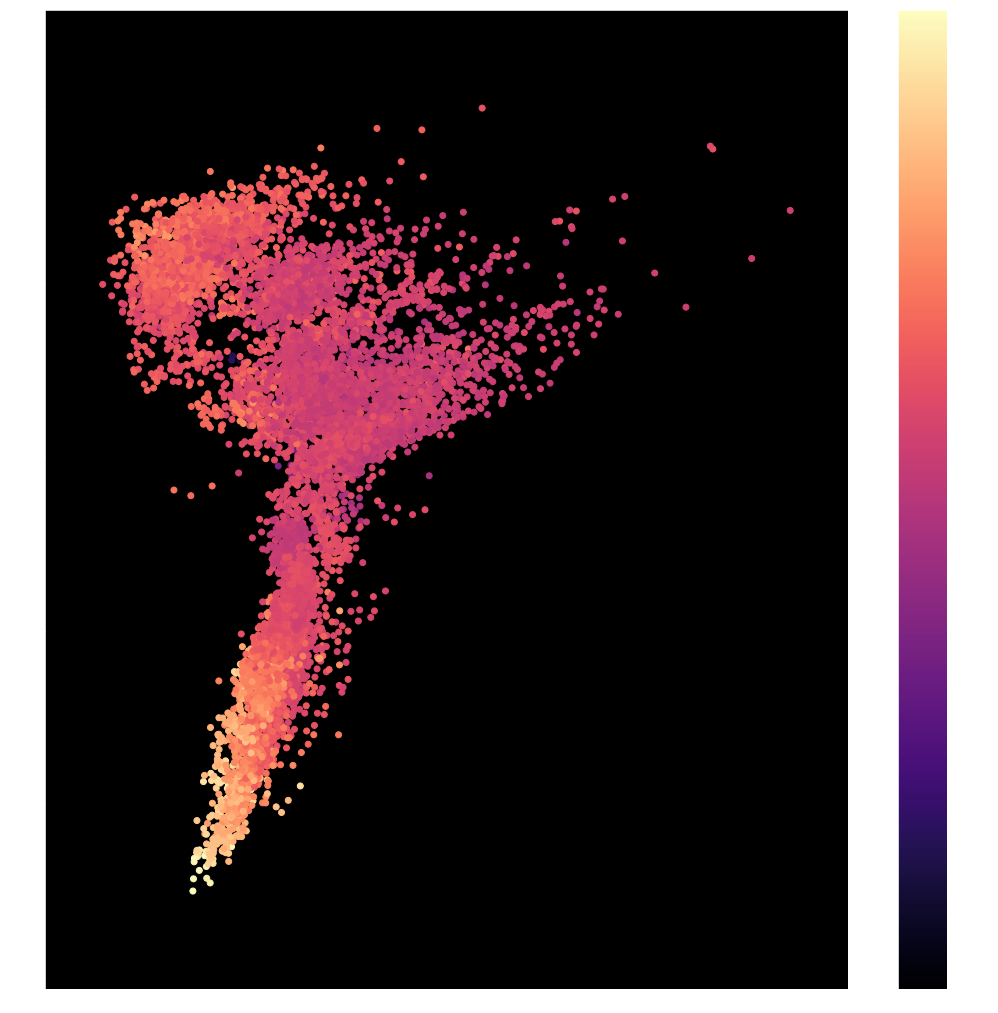

In [295]:
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(pca.components_[2,:], pca.components_[1,:], c = blnav, alpha = 1, cmap = 'magma')
fig.colorbar(dotplot, ax = None)

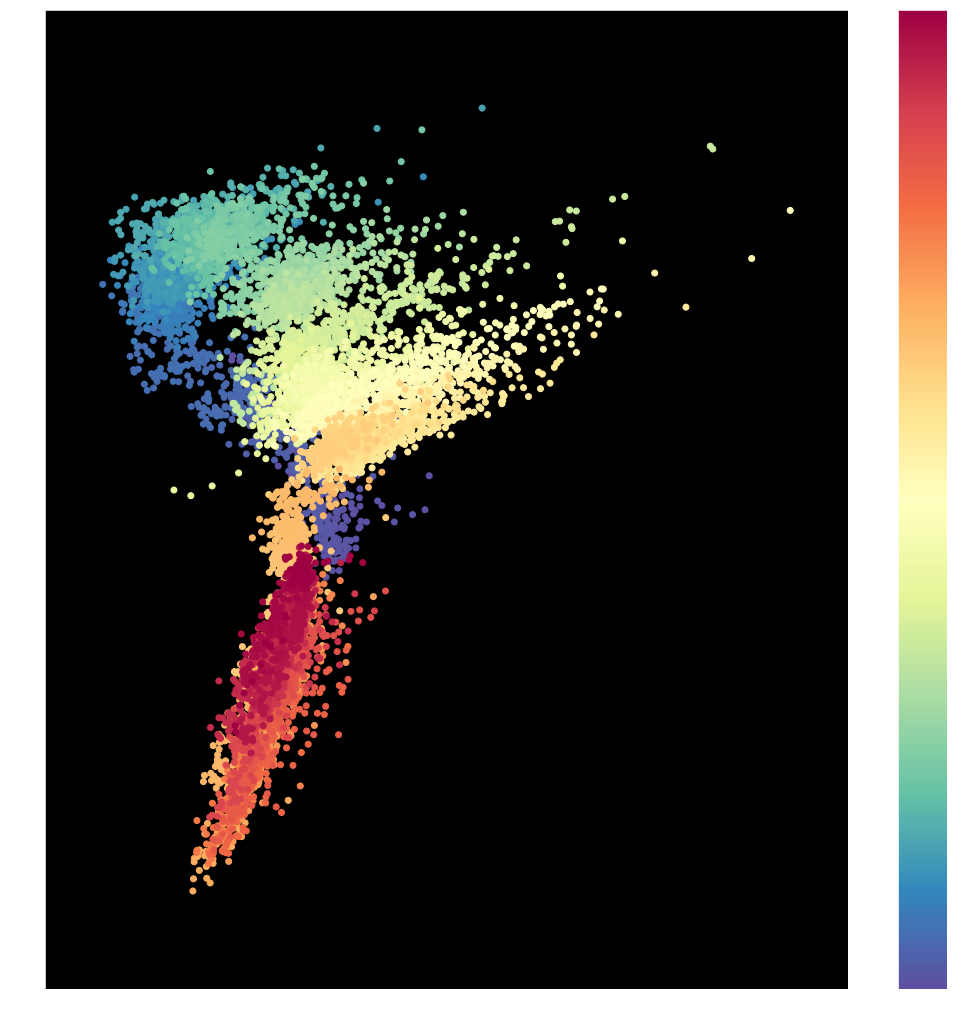

In [296]:
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(pca.components_[2,:], pca.components_[1,:], c = np.linspace(0,1, pca.components_.shape[1]), alpha = 1, cmap = 'Spectral_r')
fig.colorbar(dotplot, ax = None)

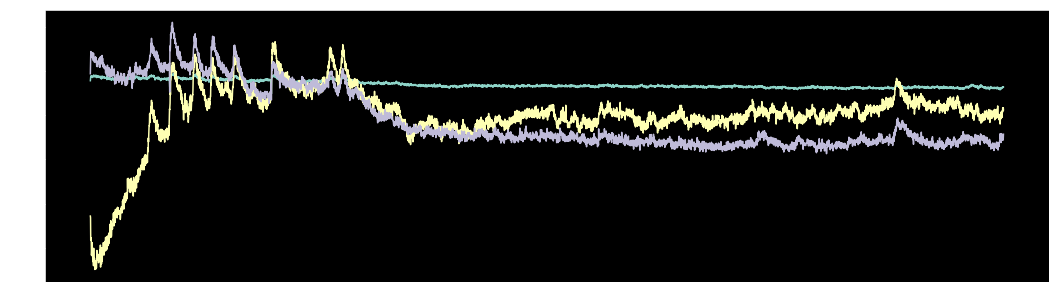

In [89]:
fig, ax = plt.subplots(figsize= (18,5))
plt.plot(pca.components_[0,:])
plt.plot(pca.components_[2,:])
plt.plot(pca.components_[1,:])
#os.chdir(Ffig)
#plt.savefig('pcalines.png', transparent =True)

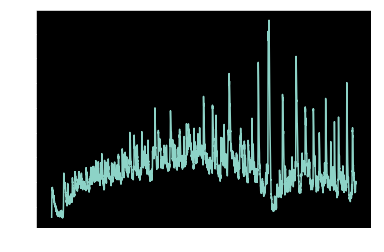

In [297]:
p5av = np.apply_along_axis(np.mean,0, np.load(p5list[i]))
plt.plot(p5av)

In [298]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 3)
#smooth = gaussian_filter1d(np.load(p5list[i]), 0.5, axis = 1)
x = pca.fit_transform(np.load(p5list[i]))

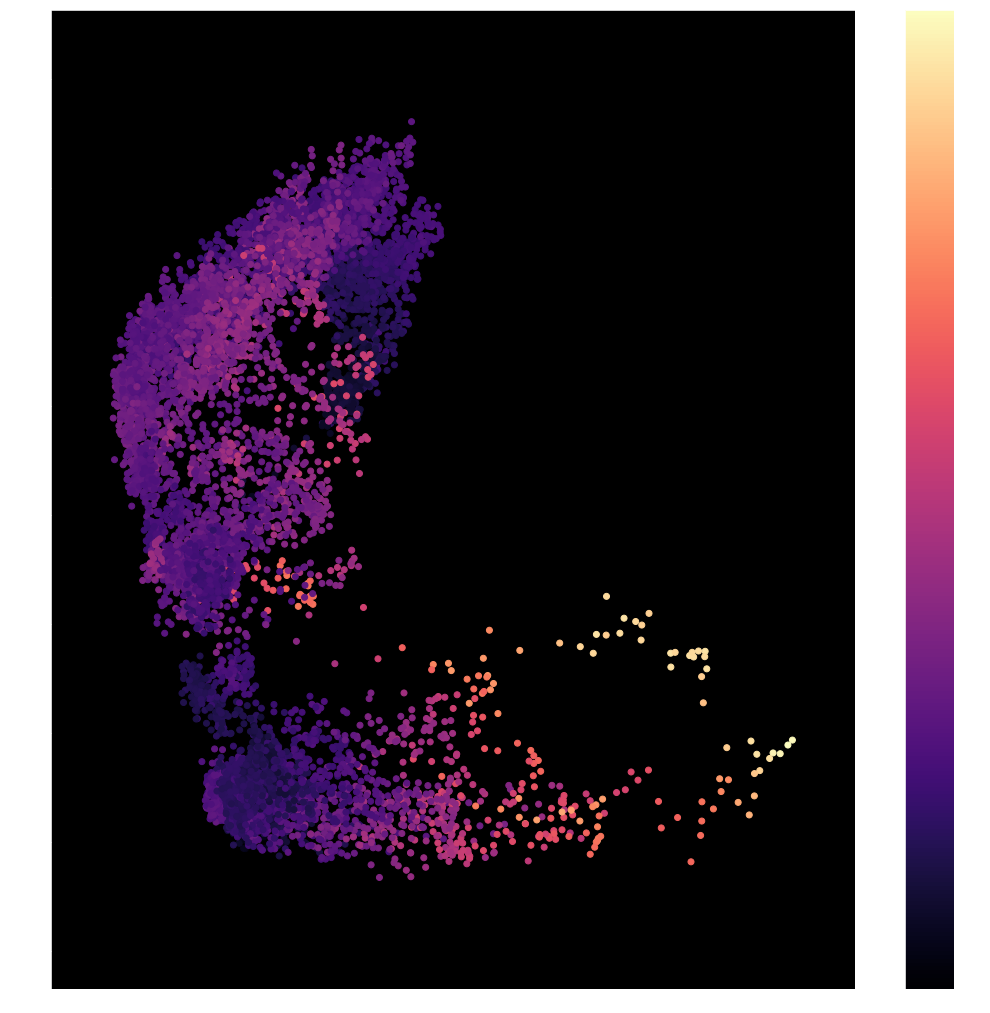

In [299]:
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(pca.components_[2,:], pca.components_[1,:], c = p5av, alpha = 1, cmap = 'magma')
fig.colorbar(dotplot, ax = None)

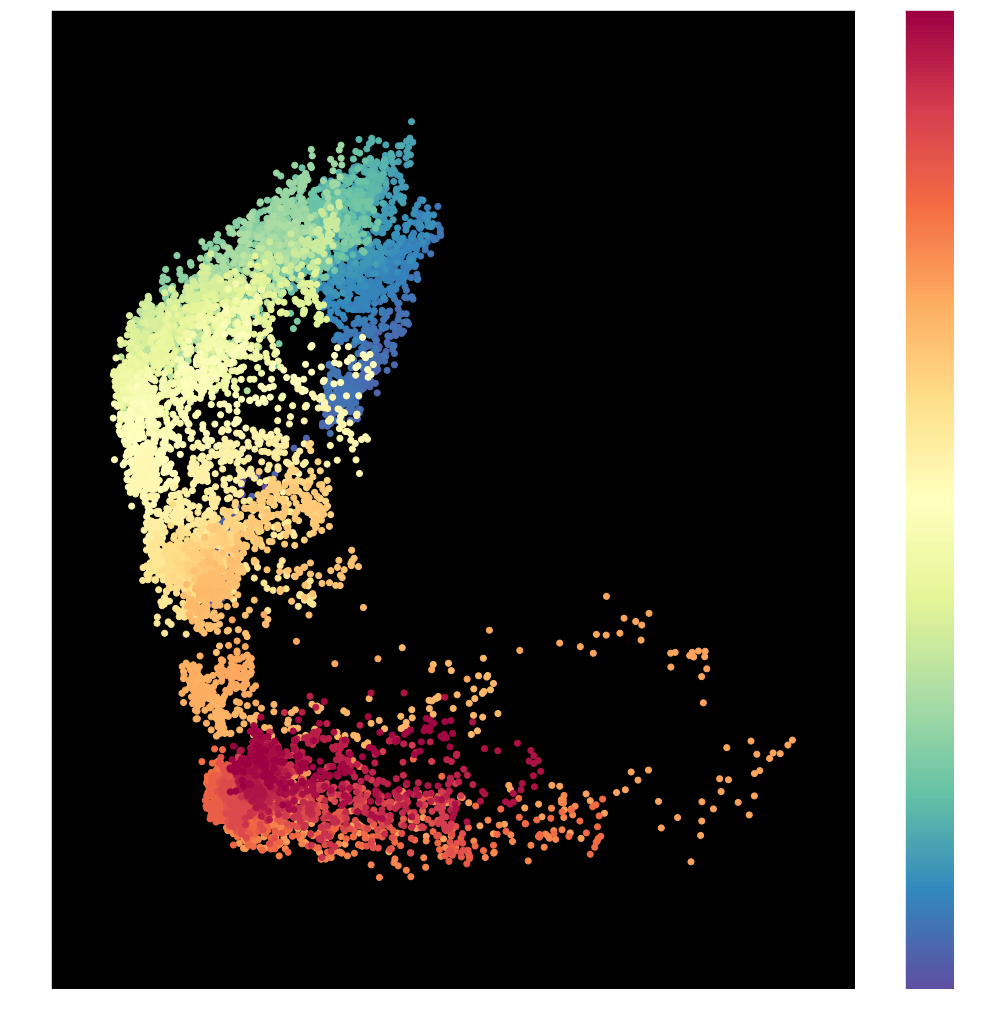

In [300]:
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(pca.components_[2,:], pca.components_[1,:], c = np.linspace(0,1, pca.components_.shape[1]), alpha = 1, cmap = 'Spectral_r')
fig.colorbar(dotplot, ax = None)

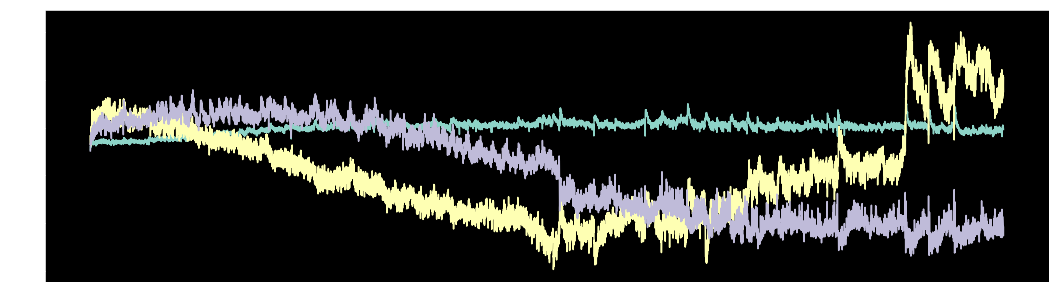

In [158]:
fig, ax = plt.subplots(figsize= (18,5))
plt.plot(pca.components_[0,:])
plt.plot(pca.components_[2,:])
plt.plot(pca.components_[1,:])
#os.chdir(Ffig)
#plt.savefig('pcalines.png', transparent =True)

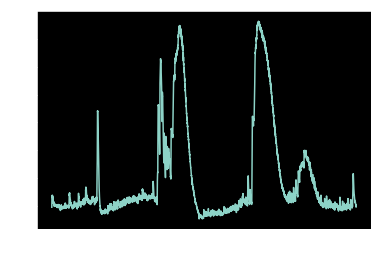

In [305]:
i = 9
p20av = np.apply_along_axis(np.mean,0, np.load(p20list[i]))
plt.plot(p20av)

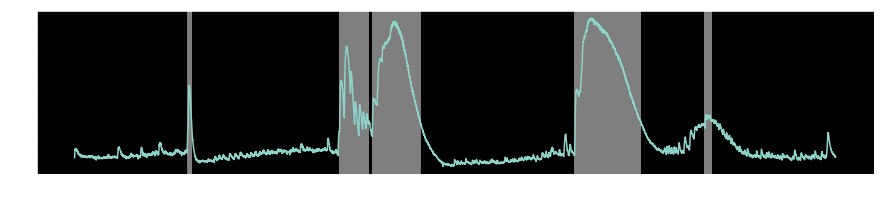

In [324]:
sem = np.std(p20av)
p   = np.where(p20av > 1*sem)[0]
plt.figure(figsize = (15,3))
for x in p: plt.axvline(x=x, c='gray')
plt.plot(p20av)

In [10]:
pcacoord = np.vstack((pca.components_[2,:], pca.components_[1,:]))
pcacoord.shape

(2, 9828)

In [11]:
meancoord = np.mean(pca.components_[2,:]), np.mean(pca.components_[1,:])
meancoord

(-0.0008655876610101741, -0.00014946497901915584)

In [12]:
dist = np.zeros(pcacoord.shape[1])

for i in range(pcacoord.shape[1]):
    dist[i] = np.linalg.norm(meancoord - pcacoord[:,i])

NameError: name 'p20av' is not defined

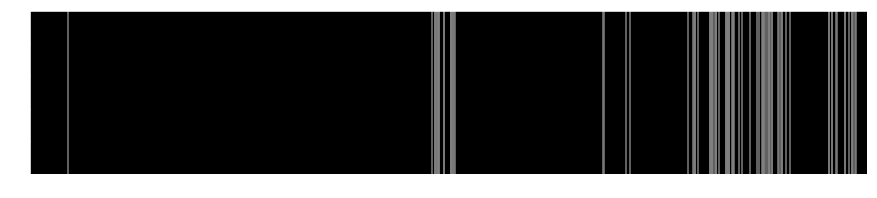

In [13]:
sem = np.std(dist)
p   = np.where(dist > 5*sem)[0]
plt.figure(figsize = (15,3))
for x in p: plt.axvline(x=x, c='gray')
plt.plot(p20av)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 3)
#smooth = gaussian_filter1d(np.load(p20list[i]), 0.5, axis = 1)
x = pca.fit_transform(np.load(p20list[i]))

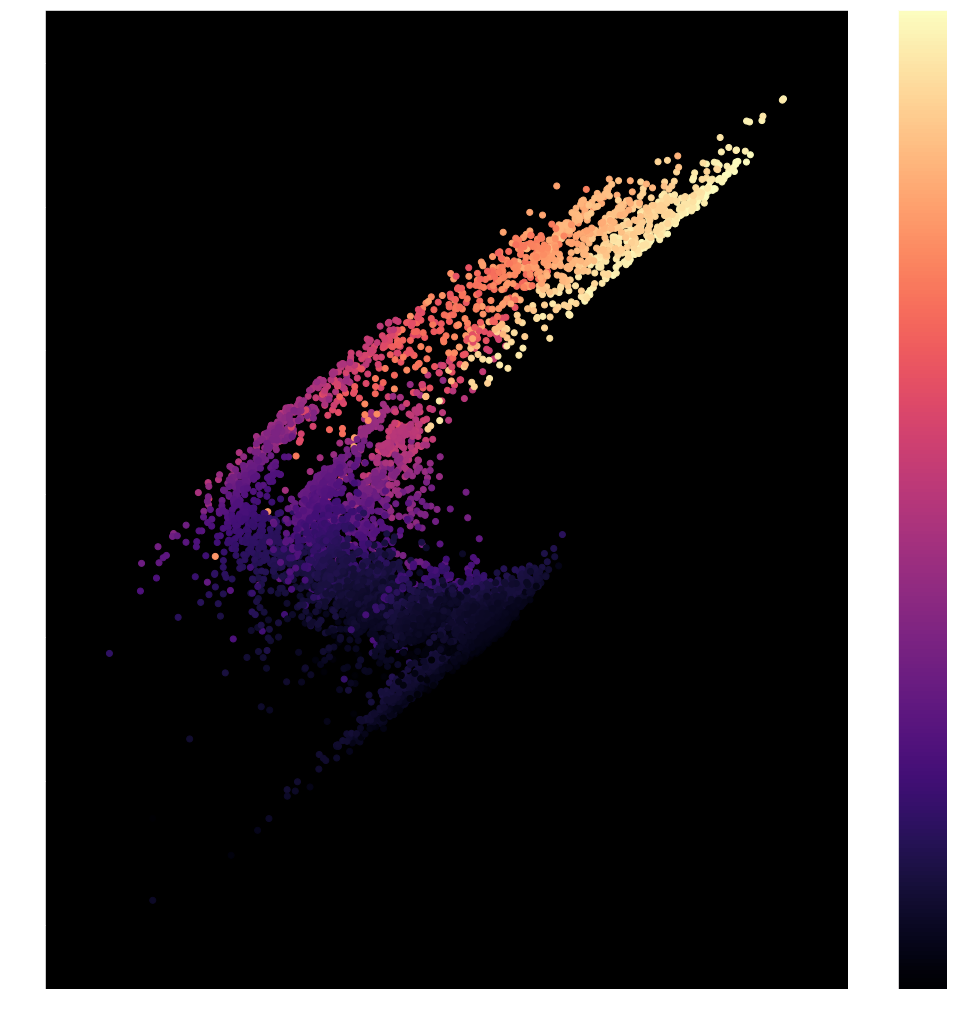

In [362]:
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(pca.components_[2,:], pca.components_[1,:], c = p20av, alpha = 1, cmap = 'magma')
fig.colorbar(dotplot, ax = None)
plt.show()

In [398]:
np.exp(2)

7.38905609893065

In [ ]:
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(pca.components_[2,:], pca.components_[1,:], c = np.linspace(0,1, pca.components_.shape[1]), alpha = 0.8, cmap = 'Spectral_r')
plt.scatter(meancoord[0], meancoord[1], s = 800)
fig.colorbar(dotplot, ax = None)
plt.show()

In [4]:
pca.components_[2,:][p].shape

NameError: name 'pca' is not defined

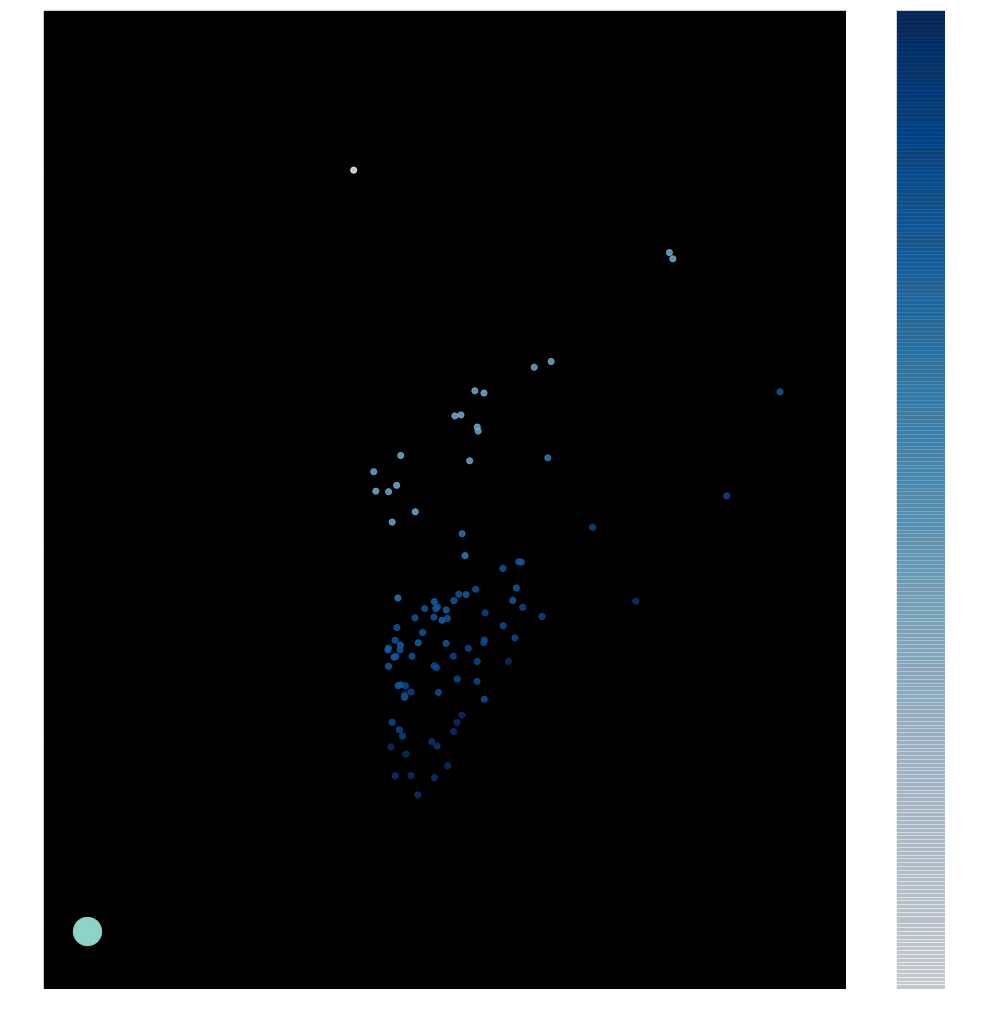

In [16]:
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(pca.components_[2,:][p], pca.components_[1,:][p], c = np.linspace(0,1, pca.components_.shape[1])[p], alpha = 0.8, cmap = 'Blues')
plt.scatter(meancoord[0], meancoord[1], s = 800)
fig.colorbar(dotplot, ax = None)
os.chdir(Ffig)
plt.savefig('bluecolourbar.png', transparent = True)
plt.show()

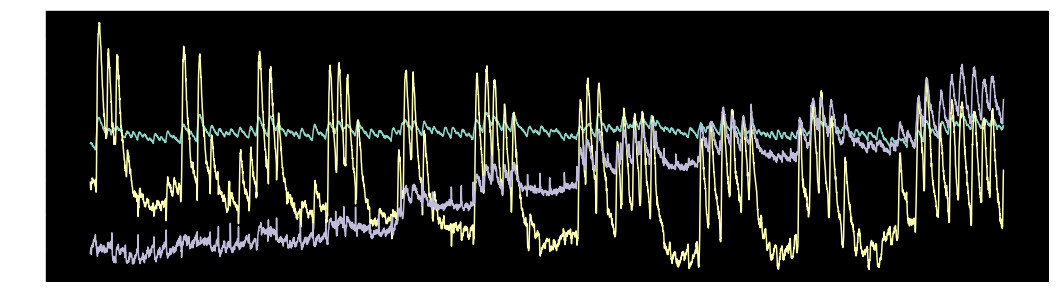

In [25]:
fig, ax = plt.subplots(figsize= (18,5))
plt.plot(pca.components_[0,:])
plt.plot(pca.components_[2,:])
plt.plot(pca.components_[1,:])
#os.chdir(Ffig)
#plt.savefig('pcalines.png', transparent =True)

# Support Vector Machine